In [1]:
# Import necessary libraries
import numpy as np 
import matplotlib.pyplot as plt
import skimage.io 
import slgbuilder

# Fix for deprecated numpy aliases used by slgbuilder for compatibility
np.bool = bool
np.int = int

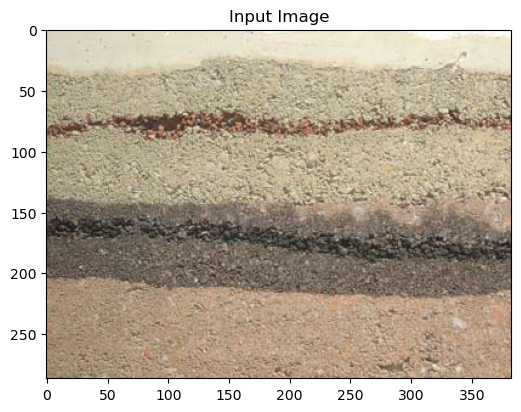

In [3]:
# Load and display the input image
I = skimage.io.imread(r'C:\Users\Alejandro\Documents\GitHub\AIA\week7\data\rammed-earth-layers-limestone.jpg').astype(np.int32)
plt.figure(figsize=(6, 6))
plt.imshow(I, cmap='gray')
plt.title('Input Image')
plt.show()

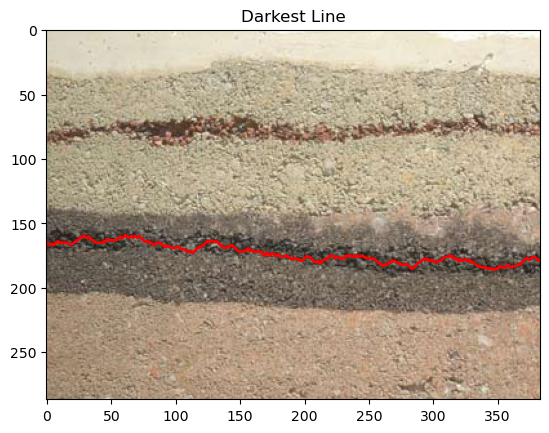

In [6]:
# Detect the darkest line
delta = 1
layer = slgbuilder.GraphObject(I)
helper = slgbuilder.MaxflowBuilder()
helper.add_object(layer)
helper.add_layered_boundary_cost()
helper.add_layered_smoothness(delta=delta, wrap=False)
helper.solve()
segmentation = helper.what_segments(layer)
segmentation_line = segmentation.shape[0] - np.argmax(segmentation[::-1, :], axis=0) - 1

# Display the result
plt.imshow(I, cmap='gray')
plt.plot(segmentation_line, 'r')
plt.title('Darkest Line')
plt.show()

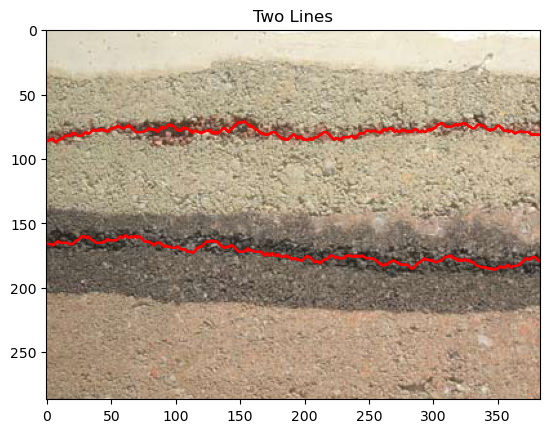

In [7]:
# Detect two lines with a minimum margin
layers = [slgbuilder.GraphObject(I), slgbuilder.GraphObject(I)]
helper = slgbuilder.MaxflowBuilder()
helper.add_objects(layers)
helper.add_layered_boundary_cost()
helper.add_layered_smoothness(delta=delta, wrap=False)
helper.add_layered_containment(layers[0], layers[1], min_margin=15)
helper.solve()
segmentations = [helper.what_segments(l).astype(np.int32) for l in layers]
segmentation_lines = [s.shape[0] - np.argmax(s[::-1, :], axis=0) - 1 for s in segmentations]

# Display the result
plt.imshow(I, cmap='gray')
for line in segmentation_lines:
    plt.plot(line, 'r')
plt.title('Two Lines')
plt.show()

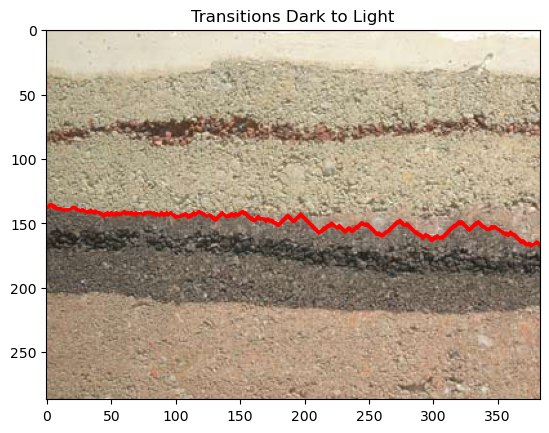

In [12]:
# Detect transitions from dark to light regions
layers = [slgbuilder.GraphObject(0*I), slgbuilder.GraphObject(0*I)]
helper = slgbuilder.MaxflowBuilder()
helper.add_objects(layers)
helper.add_layered_region_cost(layers[0], I, 255-I)
helper.add_layered_region_cost(layers[1], 255-I, I)
helper.add_layered_boundary_cost()
helper.add_layered_smoothness(delta=1, wrap=False)
helper.add_layered_containment(layers[0], layers[1], min_margin=1)
helper.solve()
segmentations = [helper.what_segments(l).astype(np.int32) for l in layers]
segmentation_lines = [s.shape[0] - np.argmax(s[::-1, :], axis=0) - 1 for s in segmentations]

# Display the results
plt.imshow(I, cmap='gray')
for line in segmentation_lines:
    plt.plot(line, 'r')
plt.title('Transitions Dark to Light')
plt.show()

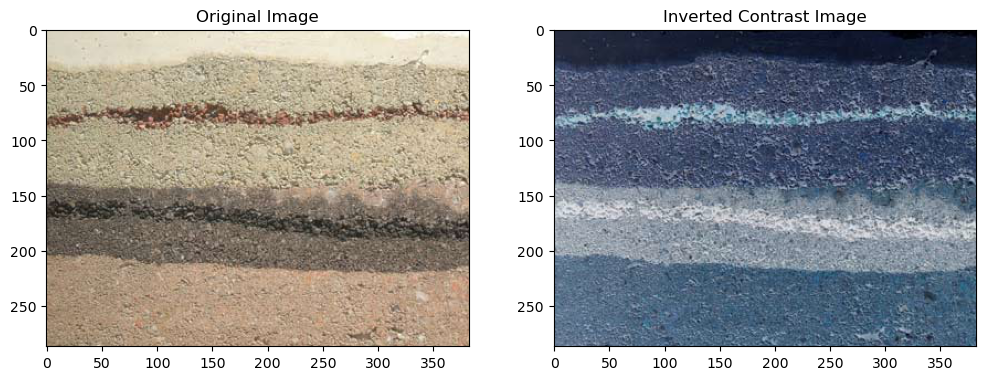

In [11]:
# Visualize cost volumes to understand the contrast being used for detection
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(255-I, cmap='gray')  # Visualize the inverse to check contrast
plt.title('Inverted Contrast Image')
plt.show()